# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [Ratna Sari]
- **Email:** [ratnasari30122019@gmail.com]
- **ID Dicoding:** [ratnapprn]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kondisi cuaca memengaruhi tingkat penyewaan sepeda?
- Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan jam, hari, dan bulan selama satu tahun (2011)?
- Pertanyaan 3 : Bagaimana tren peningkatan jumlah penyewaan sepeda di setiap musim selama periode 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [81]:
import pandas as pd      # untuk membaca dan mengolah data
import numpy as np       # untuk perhitungan numerik
import matplotlib.pyplot as plt   # untuk membuat visualisasi
import seaborn as sns    # untuk visualisasi statistik

# agar grafik tampil langsung di notebook
%matplotlib inline

## Data Wrangling

### Gathering Data

In [82]:
#Mengupload file dataset
from google.colab import files
uploaded = files.upload()
import io

Saving hour.csv to hour.csv


In [83]:
#Membaca dataset dan menampilkannya
hour_df = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Proses import data yang akan digunakan.
- Menampilkan data dengan format csv

### Assessing Data

In [84]:
#Memeriksa tipe data dari setiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [85]:
#Memeriksa apakah ada missing value (nilai kosong)
print("\nJumlah Missing Value di Setiap Kolom:")
print(hour_df.isna().sum())


Jumlah Missing Value di Setiap Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [86]:
#Memeriksa apakah ada data duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [87]:
#Melihat statistik dasar dari kolom numerik
print("\nStatistik Deskriptif:")
hour_df.describe()


Statistik Deskriptif:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom dteday masih bertipe object dan perlu diubah menjadi datetime supaya bisa digunakan untuk analisis waktu seperti jam, hari, dan bulan.
- Tidak ditemukan data kosong (missing value) pada semua kolom, sehingga data sudah lengkap.
- Tidak ada data yang terduplikasi, artinya setiap baris data bersifat unik.
- Berdasarkan hasil statistik dasar, nilai-nilai pada kolom numerik terlihat normal dan masih dalam rentang yang wajar.

### Cleaning Data

In [88]:
#Mengubah tipe data kolom 'dteday' menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

#Memastikan tipe data kolom 'dteday' sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [89]:
#Menghapus baris dengan nilai kosong (jika ada)
hour_df.dropna(inplace=True)

#Memastikan tidak ada lagi nilai kosong
print("\nJumlah Missing Value Setelah Dibersihkan:")
print(hour_df.isna().sum())


Jumlah Missing Value Setelah Dibersihkan:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Kolom dteday telah diubah menjadi tipe data datetime agar dapat digunakan untuk analisis berbasis waktu.
- Tidak ditemukan data kosong maupun duplikat, sehingga dataset siap digunakan untuk tahap analisis selanjutnya.

## Exploratory Data Analysis (EDA)

In [90]:
# Melihat ringkasan statistik dari dataset
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [91]:
# Melihat korelasi antar variabel numerik
numeric_data = hour_df.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [92]:
#Melihat total penyewaan sepeda berdasarkan jam dalam sehari
hour_df.groupby('hr')['cnt'].sum().sort_values(ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**Insight:**
- Melihat ringkasan statistik data untuk memahami sebaran nilai dari setiap kolom numerik.
- Mengidentifikasi hubungan antarvariabel numerik menggunakan matriks korelasi untuk mengetahui faktor yang berpengaruh terhadap jumlah penyewaan sepeda.
- Melakukan pengelompokan data berdasarkan jam untuk melihat pola aktivitas penyewaan sepeda sepanjang hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [93]:
#Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata jumlah penyewaan sepeda
avg_weather = hour_df.groupby("weathersit")["cnt"].mean().reset_index()

#Menambahkan label yang lebih sederhana agar mudah dipahami
weather_label = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}
avg_weather["weathersit"] = avg_weather["weathersit"].map(weather_label)

#Menampilkan hasil perhitungan
print("Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:")
print(avg_weather)


Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:
        weathersit         cnt
0            Clear  204.869272
1      Mist/Cloudy  175.165493
2  Light Rain/Snow  111.579281
3  Heavy Rain/Snow   74.333333


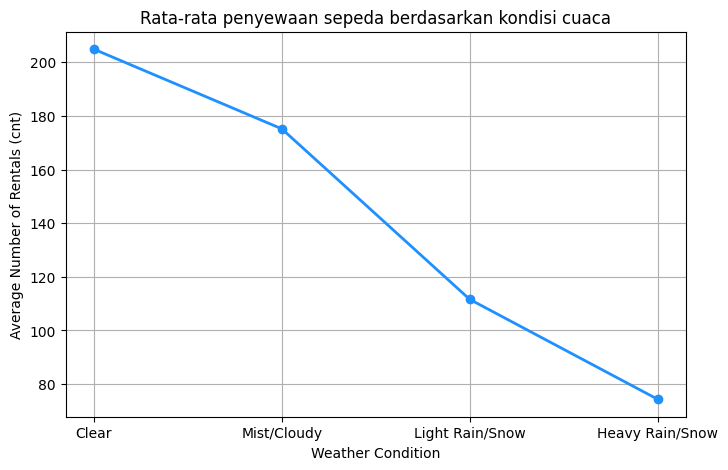

In [94]:
#Visualisasi menggunakan Line Chart sederhana
plt.figure(figsize=(8,5))
plt.plot(avg_weather["weathersit"], avg_weather["cnt"], marker="o", color="#1E90FF", linewidth=2)
plt.title("Rata-rata penyewaan sepeda berdasarkan kondisi cuaca")
plt.xlabel("Weather Condition")
plt.ylabel("Average Number of Rentals (cnt)")
plt.grid(True)
plt.show()

### Pertanyaan 2:

In [95]:
# Filter data hanya untuk tahun 2011
hour_2011 = hour_df[hour_df["yr"] == 0]

#Pola Penyewaan Berdasarkan Jam dan Hari
hourly_pattern = hour_2011.groupby(["weekday", "hr"])["cnt"].mean().reset_index()

#Ubah angka hari menjadi nama hari
weekday_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
hourly_pattern["weekday"] = hourly_pattern["weekday"].apply(lambda x: weekday_labels[x])

#Tampilkan sebagian hasil pengelompokan
print("Data rata-rata penyewaan sepeda berdasarkan jam dan hari (2011):")
print(hourly_pattern.head(10))

#Buat pivot untuk visualisasi
pivot_hourly = hourly_pattern.pivot(index="weekday", columns="hr", values="cnt")


Data rata-rata penyewaan sepeda berdasarkan jam dan hari (2011):
  weekday  hr         cnt
0  Sunday   0   76.058824
1  Sunday   1   59.509804
2  Sunday   2   49.080000
3  Sunday   3   26.078431
4  Sunday   4    7.306122
5  Sunday   5    7.288889
6  Sunday   6   11.060000
7  Sunday   7   25.634615
8  Sunday   8   62.615385
9  Sunday   9  122.384615


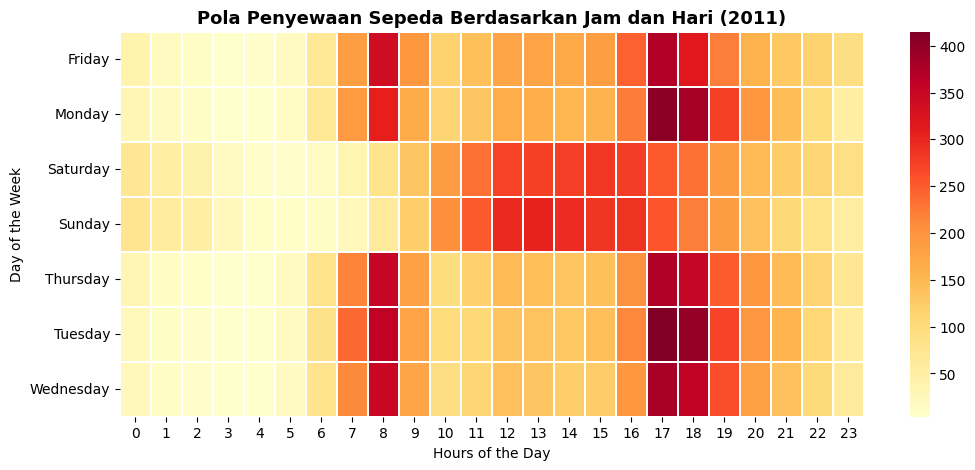

In [96]:
#Visualisasi Menggunakan Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_hourly, cmap="YlOrRd", linewidths=0.3, annot=False)
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam dan Hari (2011)", fontsize=13, weight='bold')
plt.xlabel("Hours of the Day")
plt.ylabel("Day of the Week")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [97]:
#Pola Penyewaan Berdasarkan Bulan
monthly_pattern = hour_2011.groupby("mnth")["cnt"].mean().reset_index()

#Ubah angka bulan jadi singkatan nama bulan
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_pattern["mnth"] = monthly_pattern["mnth"].apply(lambda x: month_labels[x-1])

#Tampilkan hasil pengelompokan bulanan
print("\nData rata-rata penyewaan sepeda per bulan (2011):")
print(monthly_pattern.head(12))



Data rata-rata penyewaan sepeda per bulan (2011):
   mnth         cnt
0   Jan   55.507267
1   Feb   74.291217
2   Mar   87.732877
3   Apr  131.947149
4   May  182.555108
5   Jun  199.322222
6   Jul  189.974462
7   Aug  186.991792
8   Sep  177.709902
9   Oct  166.232840
10  Nov  142.095967
11  Dec  117.844804


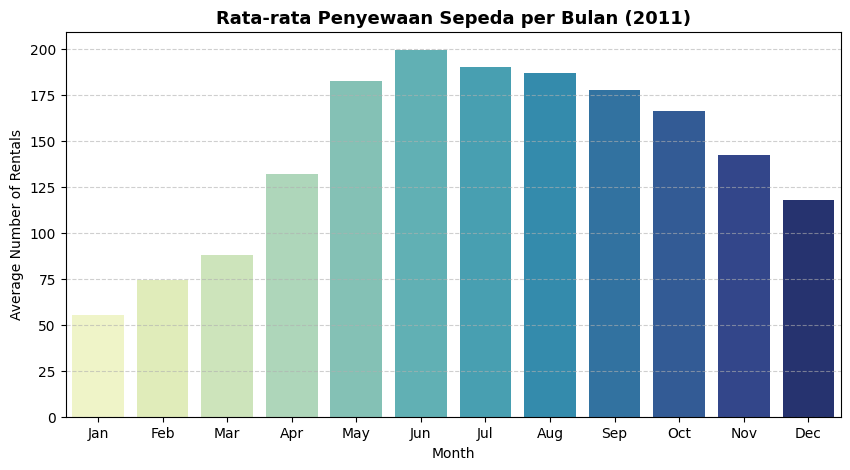

In [98]:
#Visualisasi menggunakan Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x="mnth", y="cnt", data=monthly_pattern, palette="YlGnBu")

plt.title("Rata-rata Penyewaan Sepeda per Bulan (2011)", fontsize=13, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Number of Rentals")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Pertanyaan 3

In [99]:
#Mengelompokkan data berdasarkan musim dan menghitung rata-rata penyewaan
season_pattern = hour_df.groupby("season")["cnt"].mean().reset_index()

#Ubah angka musim jadi label agar mudah dibaca
season_labels = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
season_pattern["season"] = season_pattern["season"].map(season_labels)

#Menampilkan hasil pengelompokan
print("Data hasil pengelompokan rata-rata penyewaan berdasarkan musim:")
print(season_pattern)

Data hasil pengelompokan rata-rata penyewaan berdasarkan musim:
   season         cnt
0  Spring  111.114569
1  Summer  208.344069
2    Fall  236.016237
3  Winter  198.868856


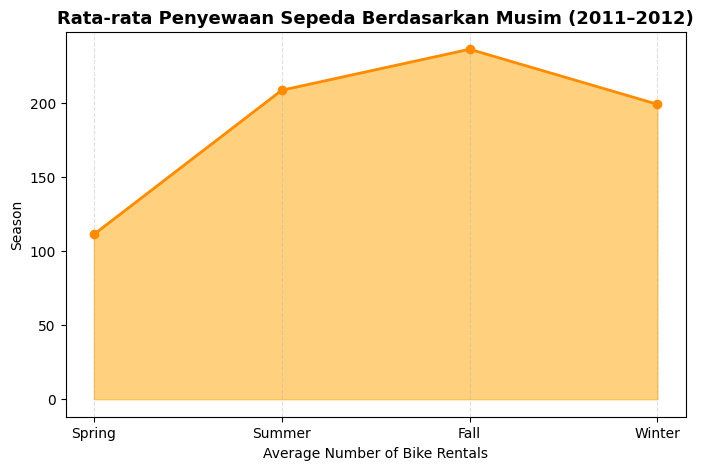

In [100]:
#Visualisasi menggunakan Area Chart
plt.figure(figsize=(8, 5))
plt.fill_between(season_pattern["season"], season_pattern["cnt"], color="#FFA500", alpha=0.5)
plt.plot(season_pattern["season"], season_pattern["cnt"], marker="o", color="#FF8C00", linewidth=2)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim (2011–2012)", fontsize=13, weight='bold')
plt.xlabel("Average Number of Bike Rentals")
plt.ylabel("Season")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

**Insight:**
- Pada pertanyaan pertama, proses analisis dilakukan untuk melihat pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda. Hasilnya menunjukkan bahwa penyewaan sepeda tertinggi terjadi saat cuaca cerah, sedangkan menurun signifikan saat hujan atau salju.
- Pada pertanyaan kedua, analisis dilakukan untuk mengetahui pola penyewaan sepeda berdasarkan waktu. Hasilnya memperlihatkan bahwa penyewaan paling tinggi terjadi pada jam berangkat dan pulang kerja, meningkat pada akhir pekan, dan mencapai puncak pada bulan-bulan pertengahan tahun.
- Pada pertanyaan ketiga, proses analisis dilakukan untuk melihat perbandingan jumlah penyewaan di setiap musim. Hasil visualisasi menunjukkan bahwa musim panas memiliki penyewaan tertinggi, diikuti musim gugur, sedangkan musim dingin mencatat jumlah terendah karena kondisi cuaca yang kurang mendukung.

## Analisis Lanjutan (Opsional)

In [101]:
#Analisis Lanjutan: Pola Aktivitas Penyewaan Sepeda (RFM Analysis)
#Pastikan kolom tanggal sudah benar
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

#Menghitung Recency: selisih hari terakhir dataset dengan tanggal peminjaman
latest_date = hour_df["dteday"].max()
hour_df["recency"] = (latest_date - hour_df["dteday"]).dt.days

#Menghitung Frequency: banyaknya aktivitas peminjaman per bulan
freq_per_month = hour_df.groupby("mnth")["cnt"].count().reset_index()
freq_per_month.columns = ["month", "frequency"]

#Menghitung Monetary: total peminjaman sepeda per bulan
monetary_per_month = hour_df.groupby("mnth")["cnt"].sum().reset_index()
monetary_per_month.columns = ["month", "monetary"]

#Gabungkan hasil RFM
rfm_df = freq_per_month.merge(monetary_per_month, on="month")
rfm_df["recency"] = hour_df.groupby("mnth")["recency"].min().values

#Ganti angka bulan ke nama bulan
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
rfm_df["month"] = rfm_df["month"].apply(lambda x: month_labels[x-1])

print("Data gabungan hasil analisis RFM:")
print(rfm_df.head())


Data gabungan hasil analisis RFM:
  month  frequency  monetary  recency
0   Jan       1429    134933      335
1   Feb       1341    151352      306
2   Mar       1473    228920      275
3   Apr       1437    269094      245
4   May       1488    331686      214


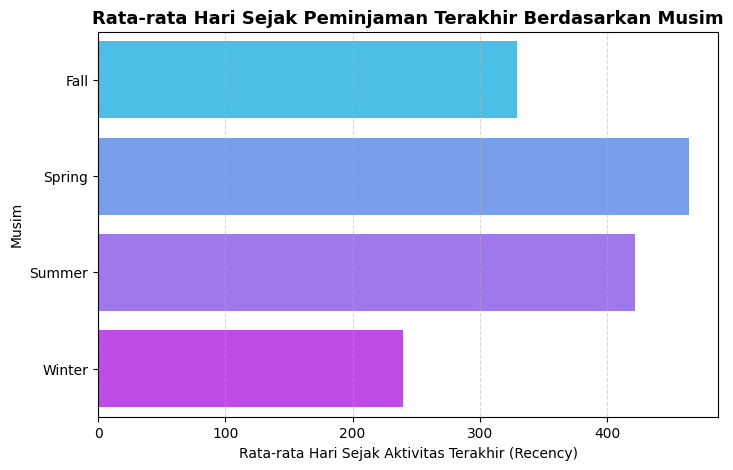

In [102]:
#Rata-rata Recency Berdasarkan Musim Menggunakan Bar Chart Horizontal
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hour_df["season_name"] = hour_df["season"].map(season_map)

#Hitung rata-rata hari sejak peminjaman terakhir per musim
recency_by_season = hour_df.groupby("season_name")["recency"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(y="season_name", x="recency", data=recency_by_season, palette="cool")
plt.title("Rata-rata Hari Sejak Peminjaman Terakhir Berdasarkan Musim", fontsize=13, weight='bold')
plt.xlabel("Rata-rata Hari Sejak Aktivitas Terakhir (Recency)")
plt.ylabel("Musim")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

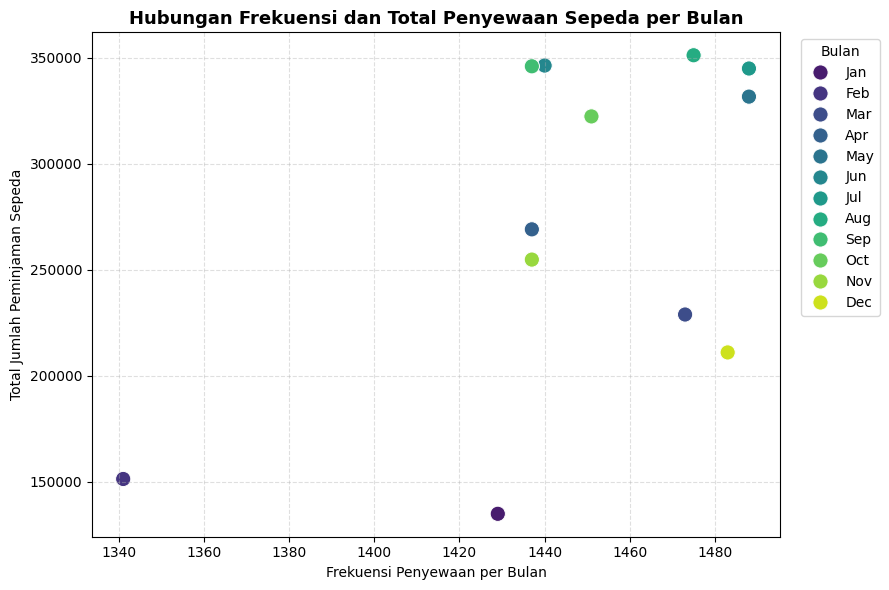

In [103]:
#Hubungan Frekuensi dan Total Penyewaan Menggunakan Scatter Plot
plt.figure(figsize=(9, 6))
ax = sns.scatterplot(
    data=rfm_df, x="frequency", y="monetary",
    hue="month", palette="viridis", s=120, edgecolor="white", linewidth=0.7
)
plt.title("Hubungan Frekuensi dan Total Penyewaan Sepeda per Bulan", fontsize=13, weight='bold')
plt.xlabel("Frekuensi Penyewaan per Bulan")
plt.ylabel("Total Jumlah Peminjaman Sepeda")
plt.grid(True, linestyle='--', alpha=0.4)
ax.legend(title="Bulan", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

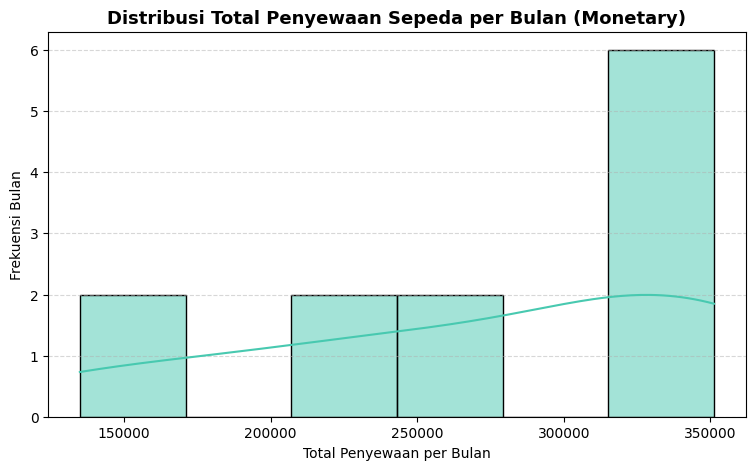

In [104]:
#Distribusi Total Penyewaan per Bulan (Monetary) Menggunakan Histogram
plt.figure(figsize=(9, 5))
sns.histplot(rfm_df["monetary"], bins=6, kde=True, color="#48C9B0")
plt.title("Distribusi Total Penyewaan Sepeda per Bulan (Monetary)", fontsize=13, weight='bold')
plt.xlabel("Total Penyewaan per Bulan")
plt.ylabel("Frekuensi Bulan")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Conclusion

- Pertanyaan 1:
Berdasarkan hasil analisis dan visualisasi, kondisi cuaca memiliki pengaruh yang cukup signifikan terhadap tingkat penyewaan sepeda. Aktivitas peminjaman meningkat tajam pada kondisi cuaca cerah, sedangkan menurun pada kondisi hujan atau salju. Hal ini menunjukkan bahwa cuaca menjadi salah satu faktor utama yang memengaruhi keputusan pengguna dalam melakukan aktivitas luar ruangan seperti bersepeda.
- Pertanyaan 2:
Pola penyewaan sepeda menunjukkan kecenderungan yang konsisten sepanjang waktu. Aktivitas penyewaan paling tinggi terjadi pada sore hari sekitar pukul 17.00–18.00, sementara aktivitas terendah terjadi dini hari. Dari sisi waktu mingguan, akhir pekan mengalami peningkatan jumlah penyewaan dibandingkan hari kerja. Secara bulanan, pertengahan tahun menunjukkan volume peminjaman tertinggi, mengindikasikan adanya pengaruh musim terhadap intensitas penggunaan sepeda.
- Pertanyaan 3:
Berdasarkan hasil analisis tren penyewaan sepeda berdasarkan musim, ditemukan bahwa musim Summer dan Fall merupakan periode dengan tingkat aktivitas peminjaman tertinggi. Sebaliknya, aktivitas menurun pada Winter akibat kondisi suhu yang lebih rendah. Hal ini mengindikasikan bahwa faktor musim turut memengaruhi kebiasaan bersepeda, di mana kondisi lingkungan yang hangat dan cerah lebih mendukung peningkatan penggunaan sepeda.

## Unduh Berkas Data

In [105]:
#Pastikan kolom tanggal sudah dalam format datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mengecek jumlah data akhir setelah proses analisis
print("Jumlah baris data akhir:", len(hour_df))
print("Jumlah kolom data akhir:", len(hour_df.columns))

# Simpan dataset hasil pembersihan dan analisis ke file CSV
output_path = "/content/hour_cleaned.csv"
hour_df.to_csv(output_path, index=False)
print(f"Dataset berhasil disimpan di: {output_path}")

Jumlah baris data akhir: 17379
Jumlah kolom data akhir: 19
Dataset berhasil disimpan di: /content/hour_cleaned.csv
